# 神经网络的学习

神经网络的特征就是可以从数据中学习。所谓从“数据中学习”，是指可以由数据自动决定权重参数的值。

感知机是一种线性分类模型，如果训练数据可以用某个超平面正确分开（即线性可分），感知机算法在有限次更新之后一定能收敛，找到一个能够将训练样本正确分类的参数向量（权重向量）。这就是著名的感知机收敛定理。

但如果训练数据本身不可通过一个线性超平面分开（即非线性可分），那么感知机算法在更新参数时将不断地遇到误分类点并尝试更改权重，却永远无法得到一个将所有点正确分开的线性边界，因而无法收敛。

线性可分问题通过有限次学习是可解的，非线性可分问题无法通过自动学习来解决。

## 感知机收敛定理（算法）

本算法旨在通过迭代更新权重向量 \mathbf{w} 来分类线性可分的数据集。

给定：
* 训练样本集 $\{(x_i, y_i)\}_{i=1}^N$ ，其中 $\mathbf{x}_i \in \mathbb{R}^{d}$ 为样本特征向量，$y_i \in \{-1, +1\}$ 为类别标签。
* 将输入扩展为 $\tilde{\mathbf{x}}_i = [\mathbf{x}_i; 1]$ （在 $\mathbf{x}_i$ 末尾添加1作为偏置项），则 $\tilde{\mathbf{x}}_i \in \mathbb{R}^{d+1}$。
* 对应的权重向量 $\tilde{\mathbf{w}} \in \mathbb{R}^{d+1}$ ，其中最后一维为偏置权重。
* 学习率参数 $\eta > 0$ （通常可取 $\eta = 1$）。

算法初始化：

$$
\tilde{\mathbf{w}}^{(0)} = \mathbf{0}
$$

算法迭代步骤：
在第 $t$ 次迭代中，对训练集进行检查：

1. 对于每个训练样本 $(\tilde{\mathbf{x}}_i, y_i)$ ，计算判别值：

$$
y_i (\tilde{\mathbf{w}}^{(t)} \cdot \tilde{\mathbf{x}}_i)
$$

2. 如果存在样本 $(\tilde{\mathbf{x}}_i, y_i)$ 满足：

$$
y_i (\tilde{\mathbf{w}}^{(t)} \cdot \tilde{\mathbf{x}}_i) \leq 0,
$$

则该样本被误分类。

3. 对某个被误分类的样本 $(\tilde{\mathbf{x}}_j, y_j)$，更新权重向量：

$$
\tilde{\mathbf{w}}^{(t+1)} = \tilde{\mathbf{w}}^{(t)} + \eta \, y_j \tilde{\mathbf{x}}_j.
$$

4. 重复以上步骤，直至不存在误分类的样本，即：

$$
\forall i, \quad y_i (\tilde{\mathbf{w}}^{(T)} \cdot \tilde{\mathbf{x}}_i) > 0.
$$

此时算法停止，并输出最终的权重向量 $\tilde{\mathbf{w}}^{(T)}$。

参数含义：

* $\tilde{\mathbf{w}}$：权重参数向量，包括偏置，决定线性分类超平面。
* $\tilde{\mathbf{x}}_i$：输入特征向量，包含样本特征和偏置项。
* $y_i$：样本标签，取值为 $-1$ 或 $+1$。
* $\eta$：学习率，用于控制更新步长，通常取 $\eta=1$ 不影响收敛性。
* $t$：迭代步数，每次更新权重向量的操作记为一轮迭代。

In [7]:
import numpy as np

def perceptron_train(X, y, eta=1.0, max_iter=1000):
    """
    使用感知机算法训练线性可分数据的分类器。
    
    参数：
    X : np.ndarray, 维度 (N, d)
        训练数据特征矩阵，其中N为样本数，d为特征维度。
    y : np.ndarray, 维度 (N,)
        训练数据标签数组，每个元素为 -1 或 +1。
    eta : float
        学习率，默认设为1.0。
    max_iter : int
        最大迭代次数，防止在非线性可分数据上陷入死循环。
    
    返回：
    w : np.ndarray, 维度 (d+1,)
        训练得到的感知机权重参数向量（含偏置）。最后一个元素为偏置项的权重。
    """
    # 获取样本数和特征维度
    N, d = X.shape
    
    # 将偏置项并入特征(在X的末尾增加一列全1)
    X_tilde = np.hstack((X, np.ones((N, 1))))
    
    # 初始化权重为0向量
    w = np.zeros(d + 1)

    for _ in range(max_iter):
        misclassified = False
        for i in range(N):
            # 检查是否误分类：y_i (w · x_i) <= 0
            if y[i] * np.dot(w, X_tilde[i]) <= 0:
                # 更新权重
                w = w + eta * y[i] * X_tilde[i]
                misclassified = True
        if not misclassified:
            # 没有误分类，训练结束
            break
    
    return w

## 感知机收敛算法问题示例

假设我们有一组二维平面上的点，用来区分苹果和橘子的类别（仅作示意，不是实际特征）。我们用坐标表示每个水果的特征，比如：

* 特征1（x轴）：大小（或宽度）
* 特征2（y轴）：重量

假设数据满足线性可分性：苹果类和橘子类在特征平面上被一条直线清晰分开。

构造示例数据：
* 苹果：特征值较小 (大小、重量较低)，分布在左下区域
* 橘子：特征值较大 (大小、重量较高)，分布在右上区域

我们手动构造数据如下（假定标签 +1 为苹果，-1 为橘子）：

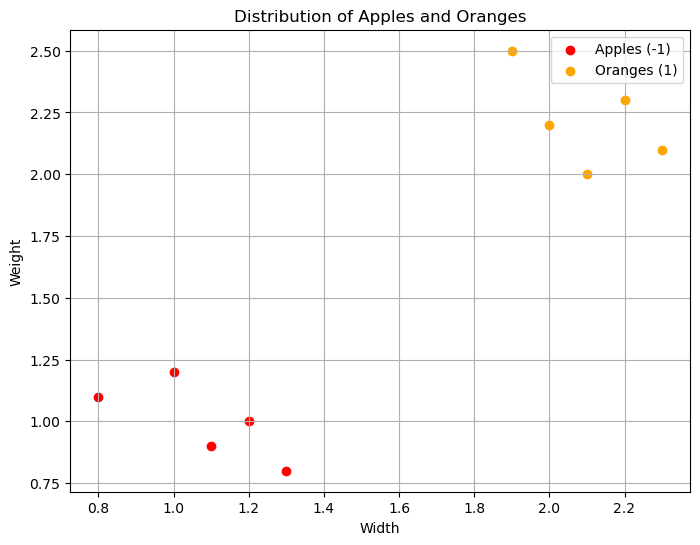

Trained weights: [-0.7 -1.   2. ]
Predictions: [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.]
True labels: [ 1  1  1  1  1 -1 -1 -1 -1 -1]
Number of correctly classified samples: 10 out of 10


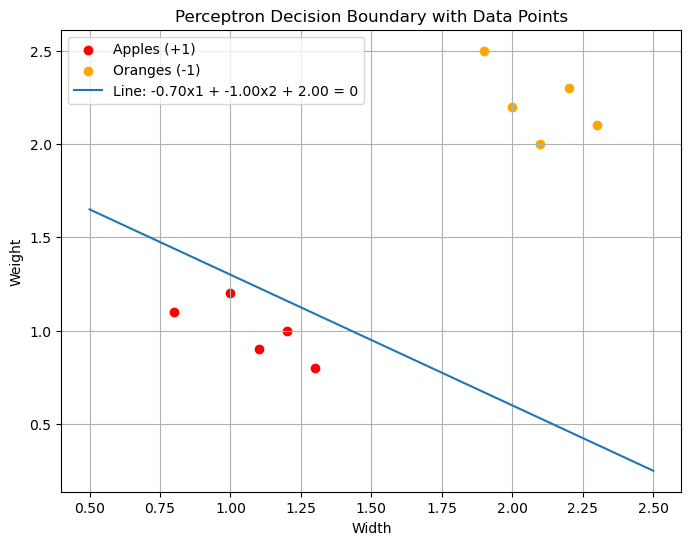

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_train(X, y, eta=1.0, max_iter=1000):
    N, d = X.shape
    X_tilde = np.hstack((X, np.ones((N, 1))))  # 增加偏置列
    w = np.zeros(d + 1)
    for _ in range(max_iter):
        misclassified = False
        for i in range(N):
            if y[i] * np.dot(w, X_tilde[i]) <= 0:
                w = w + eta * y[i] * X_tilde[i]
                misclassified = True
        if not misclassified:
            break
    return w

def plot_line_from_weights(w, x_range=(-1, 3), ax=None):
    """
    根据权重向量 w 绘制直线。
    
    参数:
    - w: 权重向量，最后一个分量为偏置参数。
    - x_range: tuple，x 轴范围 (默认 (-1, 3))。
    - ax: 可选，matplotlib 的 Axes 对象。如果为 None，则新建一个图。

    返回:
    - 绘制直线的图。
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # 解 w1 * x1 + w2 * x2 + w0 = 0 => x2 = -(w1 * x1 + w0) / w2
    x1 = np.linspace(x_range[0], x_range[1], 100)
    if w[1] != 0:  # 避免分母为 0
        x2 = -(w[0] * x1 + w[2]) / w[1]
        ax.plot(x1, x2, label=f'Line: {w[0]:.2f}x1 + {w[1]:.2f}x2 + {w[2]:.2f} = 0')
    else:
        # 如果 w[1] == 0，绘制一条垂直线
        x1_constant = -w[2] / w[0]
        ax.axvline(x=x1_constant, color='blue', label=f'Line: x1 = {x1_constant:.2f}')
    
    # 设置图形属性
    ax.set_title('Line from Weights')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()
    ax.grid(True)
    
    return ax
    
# 构造线性可分数据
# 假设苹果 (+1) 在较小的宽度和重量区间
X_apples = np.array([
    [1.0, 1.2],
    [1.3, 0.8],
    [0.8, 1.1],
    [1.2, 1.0],
    [1.1, 0.9]
])

# 假设橘子 (-1) 在较大的宽度和重量区间
X_oranges = np.array([
    [2.0, 2.2],
    [2.3, 2.1],
    [1.9, 2.5],
    [2.1, 2.0],
    [2.2, 2.3]
])

# 绘图
plt.figure(figsize=(8, 6))
plt.scatter(X_apples[:, 0], X_apples[:, 1], color='red', label='Apples (-1)')
plt.scatter(X_oranges[:, 0], X_oranges[:, 1], color='orange', label='Oranges (1)')

# 设置图形细节
plt.title('Distribution of Apples and Oranges')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
ax=plt.show()

# 合并数据，并标记标签
X = np.vstack((X_apples, X_oranges))
y = np.array([+1]*len(X_apples) + [-1]*len(X_oranges))

# 使用感知机算法训练
w = perceptron_train(X, y)
print("Trained weights:", w)

# 创建图形和绘制点集
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_apples[:, 0], X_apples[:, 1], color='red', label='Apples (+1)')
ax.scatter(X_oranges[:, 0], X_oranges[:, 1], color='orange', label='Oranges (-1)')

# 绘制感知机的分类直线
plot_line_from_weights(w, (0.5, 2.5), ax=ax)

# 设置图形细节
ax.set_title('Perceptron Decision Boundary with Data Points')
ax.set_xlabel('Width')
ax.set_ylabel('Weight')
ax.legend()
ax.grid(True)

# 测试分类效果
def perceptron_predict(X, w):
    X_tilde = np.hstack((X, np.ones((X.shape[0], 1))))
    return np.sign(X_tilde @ w)

predictions = perceptron_predict(X, w)
print("Predictions:", predictions)
print("True labels:", y)

# 检查是否全部分类正确
correct = np.sum(predictions == y)
print("Number of correctly classified samples:", correct, "out of", len(y))

通过将数据点合并到一个数组中，并为每个点分配标签，perceptron_train 的任务实际上是找到一个分类边界，使得所有数据点根据标签分布到直线（或者超平面）的一侧。

* 若 $w_1 \cdot x_1 + w_2 \cdot x_2 + w_0 > 0$ ，该点被分类为 +1（苹果）。
* 若 $w_1 \cdot x_1 + w_2 \cdot x_2 + w_0 < 0$ ，该点被分类为 -1（橘子）。

## one-hot编码

1. 非 One-Hot 编码（整数表示）

在非 One-Hot 编码中，每个类别的标签用一个整数来表示，例如：

| 类别（数字） | 标签 |
|-------------|------|
| 0           | 0    |
| 1           | 1    |
| 2           | 2    |
| …           | …    |
| 9           | 9    |

对于一个样本（手写数字图片），如果标签是 2，那么其非 One-Hot 表示为：

$$
y = 2
$$

2. One-Hot 编码表示

在 One-Hot 编码中，标签用一个长度为  C （类别数，例如 MNIST 数据集有 10 类）的向量表示，每个类别对应一个位置，标签所在的位置值为 1，其余位置为 0。

示例：

对于一个样本（手写数字图片），如果标签是 2，那么其 One-Hot 编码表示为：

$$
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
$$

标签 2 在索引 2 位置为 1，其余位置为 0。

| 区别点            | 非 One-Hot 编码（整数表示） | One-Hot 编码表示        |
|-------------------|---------------------------|-------------------------|
| **表示方式**       | 单个整数                 | 一个二进制向量          |
| **示例（标签=2）** | `2`                      | `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]` |
| **维度**          | 1                        | 类别数 \( C \) (10 维)   |
| **计算损失函数**   | 使用稀疏交叉熵           | 使用标准交叉熵          |
| **内存占用**       | 更少                     | 更多（需要多存储向量）   |
| **适用场景**       | 稀疏标签、自动类别索引   | 概率输出、标签比较      |

## 深度学习中数据的相关概念

1. **监督数据**

监督数据是指在机器学习中，带有标签的数据集。
* 每个样本由输入特征  $X$  和对应的目标标签  $y$  构成。
例如，在分类任务中：
	* 输入特征  $X$ ：如图像、文本、传感器数据。
	* 目标标签  $y$ ：如类别标注（猫、狗）、情感标签（正面、负面）。

监督学习的目标是通过给定的监督数据，学习一个函数  $f(X; \theta)$ ，使得对于输入  $X$ ，能够预测正确的标签  $y$ 。
监督数据被进一步划分为两部分：训练数据和测试数据。

2. **训练数据**

训练数据是从监督数据中抽取的一部分，用于训练模型，即优化模型的参数，使其能够尽可能准确地拟合这些训练数据。
* 模型通过在训练数据上不断调整参数，减少预测结果与真实标签之间的误差（例如通过最小化损失函数）来达到目标。

特点：
* 训练数据是模型直接接触并用于学习的样本集。
* 其作用是让模型掌握样本的特征分布。

3. **测试数据**

测试数据是从监督数据中抽取的另一部分，用于评估模型的性能。
* 测试数据与训练数据互斥，且模型在训练过程中完全不可见测试数据。
* 用于检查模型对未知数据的预测能力。

特点：
* 测试数据模拟了模型在真实场景中的表现。
* 衡量模型在数据分布一致的情况下，是否有能力泛化到未见过的数据。

4. 泛化能力

泛化能力是指模型对新数据（测试数据）做出准确预测的能力，即模型能否推广到未见过的数据集上。
* 如果模型只在训练数据上表现优秀，而在测试数据上表现差，则说明模型的泛化能力较差。

泛化能力的关键：
* 模型必须抓住训练数据中的关键模式（规律），而非记住具体样本。
* 过高或过低的模型复杂度都可能导致泛化能力下降。

5. **过拟合**

过拟合是指模型在训练数据上表现非常好，但在测试数据上表现很差。
* 过拟合的原因是模型对训练数据的特征“记忆过度”，包括了训练数据中的噪声或细节，导致模型在新数据上无法推广。

特点：
* 模型复杂度过高，能够高度拟合训练数据的每个细节。
* 泛化能力下降，在测试数据上出现较高的误差。

解决过拟合的方法：
* 增加训练数据（数据增强）。
* 使用正则化（L1/L2正则化、Dropout）。
* 减少模型复杂度（减少参数数量或网络深度）。
* 早停（Early Stopping）。
* 增加测试数据评估模型。

### 具体示例：分类任务

假设我们要用感知机模型分类苹果和橘子：

1. 监督数据：
    * 数据集：苹果和橘子的宽度、重量（特征）及类别标签。
	* 示例：$X = [[1.0, 1.2], [2.0, 2.2]]，y = [+1, -1]$。


2. 训练数据与测试数据：
	* 训练数据：大部分苹果和橘子样本。
	* 测试数据：少部分未见过的苹果和橘子样本，用于验证分类准确性。


3. 训练过程：
	* 使用训练数据调整感知机的权重，学习分类直线。


4. 模型评估：
	* 在测试数据上验证模型是否能够正确分类。


5. 泛化能力与过拟合：
	* 如果模型只记住了训练数据的样本点（例如记住苹果和橘子的每个具体位置），在新样本上表现很差，就说明模型过拟合。
	* 如果模型学习到的是苹果与橘子特征的“总体规律”（例如宽度和重量的范围差异），则说明模型具有良好的泛化能力。

## 损失函数

在机器学习和深度学习中，**损失函数（Loss Function）** 是用来度量模型预测值与真实值之间误差的一个函数。
* 损失函数的值越小，说明模型的预测结果越接近真实值。
* 训练模型的目标是通过优化算法（如梯度下降）最小化损失函数，使模型的预测能力尽可能好。

1. <span style="color: red;">**回归任务**</span>

回归任务的目标是预测连续数值输出，常用的损失函数包括：

&emsp;&emsp;<span style="color: black;">**均方误差（Mean Squared Error, MSE）**</span>：

$$
L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

   * 其中， $y_i$  是真实值， $\hat{y}_i$  是预测值， $N$  是样本数量。
   * 对较大的误差有更强的惩罚。
   * 应用：房价预测、股票价格预测等。
        
&emsp;&emsp;<span style="color: black;">**平均绝对误差（Mean Absolute Error, MAE）**</span>：

$$
L = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}_i|
$$

   * 更加鲁棒，不容易受异常值影响。
   * 应用：时间序列预测等。

2. <span style="color: red;">**分类任务**</span>

分类任务的目标是预测离散类别，常用的损失函数包括：

&emsp;&emsp;<span style="color: black;">**交叉熵损失（Cross-Entropy Loss）**</span>：

* 二分类：

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

&emsp;&emsp;&emsp;&emsp; $y_i$  是真实标签（0 或 1）。

&emsp;&emsp;&emsp;&emsp; $\hat{y}_i$  是预测概率。 $N$  是样本数量

* 多分类：

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \log(\hat{y}_{i,c})
$$

&emsp;&emsp;&emsp;&emsp; $C$  是类别数， $y_{i,c}$  是类别  c  的真实标签（1 或 0）。 $N$  是样本数量

当 $N = 1$时，给定的交叉熵损失公式为：

$$
E = -\sum_{k} t_k \log y_k
$$

其中：
* $k$  是类别索引（用于多分类问题）。
* $t_k$  是样本的真实标签，通常是 One-Hot 编码 的向量（0 或 1）。
* $y_k$  是模型输出的概率分布，即对于第  $k$  类的预测概率（通常经过 Softmax 激活函数 计算得到）。
* 这里的$t_k$ 和$y_k$采用不同的符号用以区分

对于单个样本，交叉熵损失为：

$$
E = -\sum_{k} t_k \log y_k
$$

对于多个样本（加权平均）：

$$
L = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^C t_{i,k} \log(\hat{y}_{i,k})
$$

### 交叉熵损失函数的代码实现

以下是交叉熵损失函数的 Python 实现，分别针对 单个样本 和 多个样本：

1. <span style="color: red;">**单个样本的交叉熵损失函数**</span>

对于单个样本，交叉熵损失函数的公式为：

$$
E = -\sum_{k} t_k \log y_k
$$

其中：
* $t_k$ ：真实标签（One-Hot 编码）。
* $y_k$ ：模型输出的预测概率。

In [75]:
import numpy as np

def cross_entropy_single(y_true, y_pred):
    """
    计算单个样本的交叉熵损失。
    
    参数:
    - y_true: ndarray, 真实标签 (One-Hot 编码, 例如 [0, 1, 0])
    - y_pred: ndarray, 模型的预测概率 (例如 [0.2, 0.7, 0.1])
    
    返回:
    - 交叉熵损失值
    """
    # 避免 log(0) 产生无穷大，添加一个极小值 epsilon
    # 将小于 epsilon 的值替换为 epsilon。将大于  1 - epsilon  的值替换为  1 - epsilon 。
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    loss = -np.sum(y_true * np.log(y_pred))
    return loss

# 示例
y_true = np.array([0, 1, 0])  # 真实标签：类别2 (One-Hot)
y_pred = np.array([0.2, 0.7, 0.1])  # 模型预测的概率

loss = cross_entropy_single(y_true, y_pred)
print("单个样本的交叉熵损失:", loss)

单个样本的交叉熵损失: 0.35667494393873245


2. <span style="color: red;">**多个样本的交叉熵损失函数**</span>

对于多个样本，交叉熵损失的公式为：

$$
L = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^C t_{i,k} \log y_{i,k}
$$

其中：
* $N$ ：样本数量。
* $t_{i,k}$ ：第  $i$  个样本第  $k$  类的真实标签。
* $y_{i,k}$ ：第  $i$  个样本第  $k$  类的预测概率。

In [79]:
def cross_entropy_multiple(y_true, y_pred):
    """
    计算多个样本的平均交叉熵损失。
    
    参数:
    - y_true: ndarray, 真实标签矩阵 (One-Hot 编码, 例如 [[0, 1, 0], [1, 0, 0]])
    - y_pred: ndarray, 模型的预测概率矩阵 (例如 [[0.2, 0.7, 0.1], [0.8, 0.1, 0.1]])
    
    返回:
    - 平均交叉熵损失值
    """
    # 避免 log(0) 产生无穷大，添加一个极小值 epsilon
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    return loss

# 示例
y_true = np.array([
    [0, 1, 0],  # 第1个样本：真实类别2
    [1, 0, 0]   # 第2个样本：真实类别1
])

y_pred = np.array([
    [0.2, 0.7, 0.1],  # 第1个样本的预测概率
    [0.8, 0.1, 0.1]   # 第2个样本的预测概率
])

loss = cross_entropy_multiple(y_true, y_pred)
print("多个样本的平均交叉熵损失:", loss)

多个样本的平均交叉熵损失: 0.2899092476264711


### mini-batch学习

**Mini-Batch 学习** 是一种在机器学习模型训练过程中，将训练数据分成若干个较小的子集（称为 Mini-Batch，即小批量），并以这些小批量为单位进行模型参数的更新或优化的学习方法。

以下是一个通用的 Python 函数实现，它可以同时处理单个数据和批量数据的交叉熵损失函数计算：

In [90]:
import numpy as np

def cross_entropy_loss(y_true, y_pred):
    """
    计算交叉熵损失，可以处理单个数据和批量数据两种情况。
    
    参数:
    - y_true: ndarray, 真实标签（One-Hot 编码）
              - 单个样本: shape = (C,), 如 [0, 0, 1, 0]
              - 批量样本: shape = (N, C), 如 [[0, 0, 1, 0], [0, 1, 0, 0]]
    - y_pred: ndarray, 模型输出的预测概率（经过 Softmax）
              - 单个样本: shape = (C,), 如 [0.1, 0.2, 0.7, 0.0]
              - 批量样本: shape = (N, C), 如 [[0.1, 0.2, 0.7, 0.0], [0.3, 0.4, 0.2, 0.1]]
    
    返回:
    - loss: float, 交叉熵损失值
    """
    # 避免 log(0) 产生无穷大，进行数值稳定性处理
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    
    # 判断是单个数据还是批量数据
    if y_true.ndim == 1:
        # 单个样本的交叉熵损失 一维数组，表示单个样本
        loss = -np.sum(y_true * np.log(y_pred))
    elif y_true.ndim == 2:
        # 批量样本的平均交叉熵损失 二维数组，表示批量样本
        loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    else:
        raise ValueError("y_true 和 y_pred 的维度必须是 1 或 2。")
    
    return loss

# 示例代码
# 单个样本情况
y_true_single = np.array([0, 0, 1, 0])  # 真实标签（One-Hot）
y_pred_single = np.array([0.1, 0.2, 0.7, 0.0])  # 预测概率

# 批量数据情况
y_true_batch = np.array([
    [0, 0, 1, 0],  # 第1个样本的真实标签
    [0, 1, 0, 0]   # 第2个样本的真实标签
])
y_pred_batch = np.array([
    [0.1, 0.2, 0.7, 0.0],  # 第1个样本的预测概率
    [0.2, 0.6, 0.1, 0.1]   # 第2个样本的预测概率
])

# 计算单个样本的交叉熵损失
loss_single = cross_entropy_loss(y_true_single, y_pred_single)
print(f"Cross-entropy loss for a single sample: {loss_single:.4f}")

# 计算批量数据的平均交叉熵损失
loss_batch = cross_entropy_loss(y_true_batch, y_pred_batch)
print(f"Average cross-entropy loss for batch data: {loss_batch:.4f}")

Cross-entropy loss for a single sample: 0.3567
Average cross-entropy loss for batch data: 0.4338


上面代码基于one-hot编码实现的，对于非 One-Hot 编码的交叉熵损失计算，标签  $y_{\text{true}}$  是整数索引（而不是向量），表示类别索引。这种情况下，我们需要对公式进行修改，直接使用对应类别的概率进行计算。

下面是非 One-Hot 编码的交叉熵损失函数实现：

In [95]:
import numpy as np

def cross_entropy_loss_non_onehot(y_true, y_pred):
    """
    计算非 One-Hot 编码形式的交叉熵损失，可以处理单个数据和批量数据。
    
    参数:
    - y_true: ndarray/int, 真实标签（非 One-Hot 编码）
              - 单个样本: shape = (), 如 2
              - 批量样本: shape = (N,), 如 [2, 1]
    - y_pred: ndarray, 模型输出的预测概率（经过 Softmax）
              - 单个样本: shape = (C,), 如 [0.1, 0.2, 0.7, 0.0]
              - 批量样本: shape = (N, C), 如 [[0.1, 0.2, 0.7, 0.0], [0.2, 0.6, 0.1, 0.1]]
    
    返回:
    - loss: float, 交叉熵损失值
    """
    # 将 y_true 转换为 NumPy 数组，确保有 ndim 属性
    y_true = np.array(y_true)
    
    # 避免 log(0) 产生无穷大，进行数值稳定性处理
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)

    # 判断是单个样本还是批量数据
    if y_true.ndim == 0:  # 单个样本
        loss = -np.log(y_pred[y_true])
    elif y_true.ndim == 1:  # 批量数据
        loss = -np.mean(np.log(y_pred[np.arange(len(y_true)), y_true]))
    else:
        raise ValueError("y_true 的维度必须是 0（单个样本）或 1（批量样本）。")
    
    return loss

# 示例代码
# 单个样本情况（非 One-Hot 编码）
y_true_single = 2  # 类别索引（非 One-Hot 编码）
y_pred_single = np.array([0.1, 0.2, 0.7, 0.0])  # 预测概率

# 批量数据情况（非 One-Hot 编码）
y_true_batch = np.array([2, 1])  # 类别索引（非 One-Hot 编码）
y_pred_batch = np.array([
    [0.1, 0.2, 0.7, 0.0],  # 第1个样本的预测概率
    [0.2, 0.6, 0.1, 0.1]   # 第2个样本的预测概率
])

# 计算单个样本的交叉熵损失
loss_single = cross_entropy_loss_non_onehot(y_true_single, y_pred_single)
print(f"Cross-entropy loss for a single sample (non-One-Hot): {loss_single:.4f}")

# 计算批量数据的平均交叉熵损失
loss_batch = cross_entropy_loss_non_onehot(y_true_batch, y_pred_batch)
print(f"Average cross-entropy loss for batch data (non-One-Hot): {loss_batch:.4f}")

Cross-entropy loss for a single sample (non-One-Hot): 0.3567
Average cross-entropy loss for batch data (non-One-Hot): 0.4338


代码中 y_pred[np.arange(len(y_true)), y_true] 是 NumPy 高级索引（Fancy Indexing） 的一种用法，具体作用是从 y_pred 数组中，根据 y_true 提供的索引，逐行提取特定位置的元素。

### 为什么要使用损失函数

在神经网络训练中，损失函数（如交叉熵损失）被用作优化目标，而不是准确率。

1. 损失函数对优化更友好

损失函数通常是可微的连续函数，这使得我们可以使用梯度下降及其变体（如 Adam）进行参数更新。
* 准确率 是一个**离散且不可微的函数**，无法直接计算关于模型参数的导数（梯度）。
* 优化算法依赖于梯度来调整模型参数，从而最小化损失函数。如果使用准确率作为目标，我们无法计算梯度，优化过程无法进行。

举例：
* **交叉熵损失** 可以用来衡量真实概率分布和预测概率分布之间的差异，它是一个平滑、可微的函数。
* **准确率** 只是分类结果的比率（例如：多少个样本预测正确），它的值是离散的，且只有在类别预测完全变化时才会改变。

2. 损失函数提供更精细的反馈

损失函数能够提供更精确的误差反馈，使得模型参数在训练过程中不断调整，逐步逼近目标。

精度的局限性：
* 精度只能告诉我们“对”还是“错”，它是一个**整体的评估指标**。
* 精度无法反映模型预测的置信度或错误的程度。

损失函数的优势：
* 损失函数会考虑模型输出的**置信度**（例如 Softmax 输出的概率分布）。
* 例如，在交叉熵损失中：
* 如果模型预测概率为  $[0.1, 0.2, 0.7]$ ，真实类别是 2，损失值较小。
* 如果预测概率为  $[0.3, 0.3, 0.4]$ ，尽管预测结果仍然是 2，但损失值较大，因为模型对预测结果的置信度较低。

损失函数的平滑反馈帮助模型逐步收敛，而不仅仅是“是否正确”。

3. 准确率对参数更新不敏感

在训练过程中，准确率作为指标存在不连续性，无法提供参数调整的方向和大小。
* 假设一个分类任务中有 10 类，模型的预测概率输出为：
* $[0.1, 0.2, 0.3, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] $
* 如果实际标签是第 4 类：
* 精度指标只能判断“是否正确”，而无法区分模型预测靠近目标还是偏离目标。
* 而交叉熵损失会根据预测概率和真实概率的差异，给出明确的误差反馈。

4. 损失函数与概率分布的关系

神经网络的输出通常是一个概率分布（如通过 Softmax 激活函数），而损失函数（如交叉熵）正好用来衡量两个概率分布之间的距离。
这种数学上的严谨性使得损失函数能够更好地指导网络学习。

5. 训练与评估的分离
* 损失函数 是训练阶段的优化目标，指导模型学习。
* 准确率 是评估阶段的性能指标，用来衡量模型训练后的效果。

通过这种分离：
* 在训练时，使用损失函数最小化误差。
* 在验证和测试时，使用准确率或其他性能指标来评估模型的泛化能力。

这样既能保证训练过程可优化，又能在最终结果中衡量实际效果。

<span style="color: red;">**总结**</span>

神经网络训练使用 损失函数 而非 准确率 作为优化目标，主要原因是：
1. 损失函数可微且连续，能够用于梯度下降等优化算法。
2. 损失函数提供精细的反馈，可以量化预测误差的程度，而准确率只能提供整体的对错评估。
3. 准确率不敏感且不可导，无法指导参数更新。
4. 损失函数适配概率分布，能够衡量预测分布与真实分布的差异。
5. 训练与评估分离：训练时优化损失函数，评估时使用准确率等指标衡量效果。

因此，损失函数是更合适的优化目标，而准确率是一个重要的评估指标。

## 数值微分

### 导数

导数表示函数在某一点的变化率，它描述了函数在该点的切线斜率。
对于函数  $f(x)$ ，其导数定义为：

$$
f{\prime}(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
$$


含义：
* $x$ ：目标点。
* $h$ ：一个趋近于 0 的增量。
* $f{\prime}(x)$ ：函数在  $x$  处的导数，表示函数的瞬时变化率。

### 数值微分的定义式

数值微分是一种通过有限差分法（Finite Difference）近似计算函数导数的数值方法。常用的数值微分方法有以下几种：

**前向差分法（Forward Difference）**

$$
f{\prime}(x) \approx \frac{f(x + h) - f(x)}{h}
$$

* $h$  是一个很小的值（如  $10^{-5}$ ）。
* 误差阶为  $O(h)$ 。

**后向差分法（Backward Difference）**

$$
f{\prime}(x) \approx \frac{f(x) - f(x - h)}{h}
$$

* $h$  是一个很小的值。
* 误差阶为  $O(h)$ 。

**中心差分法（Central Difference）**

$$
f{\prime}(x) \approx \frac{f(x + h) - f(x - h)}{2h}
$$

* 中心差分法的误差阶为  $O(h^2)$ ，精度较高。

### 偏导数

偏导数是对多元函数的某一个自变量求导时，保持其他自变量固定不变的导数。
设函数  $f(x_1, x_2, \dots, x_n)$  是多元函数，其关于第  $i$  个自变量  $x_i$  的偏导数定义为：

$$
\frac{\partial f}{\partial x_i} = \lim_{h \to 0} \frac{f(x_1, \dots, x_i + h, \dots, x_n) - f(x_1, \dots, x_i, \dots, x_n)}{h}
$$


含义：
* $x_1, x_2, \dots, x_n$ ：函数的多个自变量。
* $x_i$ ：当前要求偏导的变量，其他变量保持不变。
* $h$ ：一个趋近于 0 的增量。


### 总结

| 名称                | 定义式                                                                 | 适用情况                     |
|---------------------|------------------------------------------------------------------------|------------------------------|
| **导数**            | $ f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} $                 | 单变量函数的导数             |
| **数值微分**        | $ f'(x) \approx \frac{f(x + h) - f(x)}{h}  (前向差分)$               | 导数的数值近似计算           |
| **偏导数**          | $ \frac{\partial f}{\partial x_i} = \lim_{h \to 0} \frac{f(x_1, \dots, x_i + h, \dots) - f(x)}{h} $ | 多元函数关于某一变量的导数   |

## 梯度

梯度 是多元函数的导数向量，表示函数在某一点的变化率和方向。它是标量场（即一个数值随空间坐标变化的函数）在特定点的导数向量。

在机器学习、深度学习和优化问题中，梯度被广泛用来指导模型参数的更新，帮助寻找函数的最小值或最大值。

**梯度的数学定义**

对于一个多元函数  $f(x_1, x_2, \dots, x_n)$ ，其关于所有变量的梯度定义为：

$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right)
$$

* $\nabla f$ ：表示函数  $f$  的梯度（梯度向量）。
* $\frac{\partial f}{\partial x_i}$ ：表示函数  $f$  关于第  $i$  个自变量的偏导数。
* 梯度是一个向量，其每个分量是函数关于对应变量的偏导数。

**梯度的含义**

1. 方向：
梯度向量指向函数值增长最快的方向，即函数值变化率最大的方向。

2. 大小：
梯度向量的模（长度）表示函数在该点的变化率的大小。
* 如果梯度模很大，表示函数在该点的变化非常剧烈。
* 如果梯度接近零，表示函数在该点的变化非常小，可能是极值点。

**梯度与优化问题**

在机器学习和深度学习中，梯度用于最小化损失函数  $$L(\theta)$$ ，其中  $\theta$  是模型的参数。
通过梯度下降法（Gradient Descent），参数按照梯度的反方向更新，从而逐步减小损失函数的值：

$$
\theta \leftarrow \theta - \eta \cdot \nabla L(\theta)
$$

* $\eta$ ：学习率，表示参数更新的步长。
* $\nabla L(\theta)$ ：损失函数  $L$  关于参数  $\theta$  的梯度向量。

**梯度的示例**

示例函数： $f(x, y) = x^2 + y^2$

1. 函数的梯度计算：

$$
\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)
= \left( 2x, 2y \right)
$$

2. 梯度解释：
* 在任意点  $(x, y)$ ，梯度向量为  $(2x, 2y)$ 。
* 梯度的方向指向远离原点的方向（即函数值增大的方向）。
* 梯度的大小与点  $(x, y)$  到原点的距离成正比。

Gradient at point [3. 4.]: [6. 8.]


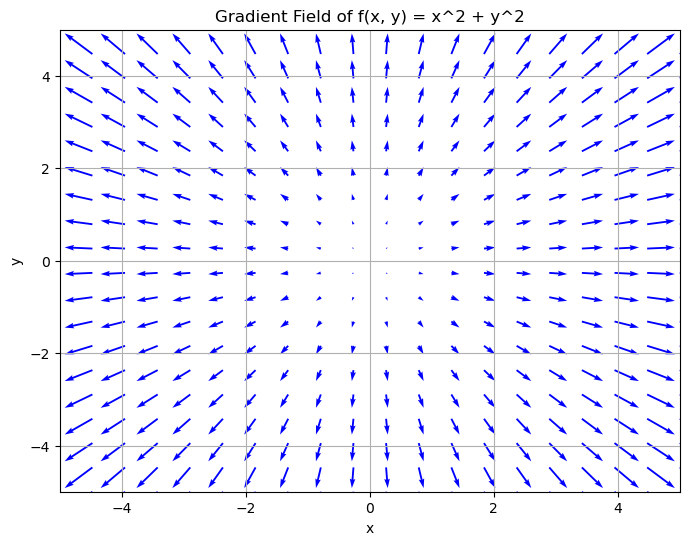

In [132]:
import numpy as np
import matplotlib.pyplot as plt

def numerical_gradient(f, x):
    """
    使用中心差分法计算多元函数在某一点的梯度。
    
    参数:
    - f: 函数对象，输入为一个向量 x。
    - x: ndarray，点的坐标（输入值）。
    
    返回:
    - grad: ndarray，函数在 x 点的梯度向量。
    """
    h = 1e-4  # 微小的步长
    grad = np.zeros_like(x)  # 初始化梯度向量

    for i in range(x.size):
        x_plus_h = x.copy()
        x_minus_h = x.copy()
        x_plus_h[i] += h
        x_minus_h[i] -= h
        
        # 使用中心差分法近似偏导数
        grad[i] = (f(x_plus_h) - f(x_minus_h)) / (2 * h)
        
    return grad

def func(x):
    """
    示例函数: f(x, y) = x^2 + y^2
    输入:
    - x: ndarray, 包含两个元素 [x, y]
    输出:
    - 函数值
    """
    return x[0]**2 + x[1]**2

def plot_gradient_field():
    """
    绘制函数 f(x, y) = x^2 + y^2 的梯度场。
    """
    # 在网格上计算梯度
    x = np.linspace(-5, 5, 20)  # x 坐标范围
    y = np.linspace(-5, 5, 20)  # y 坐标范围
    X, Y = np.meshgrid(x, y)    # 创建网格

    # 计算每个点的梯度
    U = np.zeros_like(X)  # x 方向的梯度分量
    V = np.zeros_like(Y)  # y 方向的梯度分量

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            grad = numerical_gradient(func, np.array([X[i, j], Y[i, j]]))
            U[i, j] = grad[0]  # x 方向梯度
            V[i, j] = grad[1]  # y 方向梯度

    # 绘制梯度场
    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=20)
    plt.title("Gradient Field of f(x, y) = x^2 + y^2")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid()
    plt.show()

# 测试计算梯度
point = np.array([3.0, 4.0])
grad_at_point = numerical_gradient(func, point)
print(f"Gradient at point {point}: {grad_at_point}")

# 绘制梯度场
plot_gradient_field()

图中显示  $f(x, y) = x^2 + y^2$  的梯度向量场，<span style="color: red;">**向量的方向指向函数值增大的方向，向量长度表示变化率的大小**</span>。

所有梯度都指向远离原点的方向，因为原点是函数的最小值。

### 梯度法
梯度法（Gradient Method）是一种基于 梯度信息 的优化方法，广泛应用于机器学习、深度学习和数值优化中。它通过迭代地更新变量，使目标函数（如损失函数）逐步接近最小值（或最大值）。

在数学中，直接求导并令导数等于 0 确实可以找到某些函数的极值点（例如解析解），但在实际应用中，这种方法往往不适用或难以实现。因此，梯度法 等数值优化方法应运而生。

它本质上是一个局部优化方法，无法保证找到全局最优解。

梯度法的基本思想

对于目标函数  $f(x)$ ，其梯度 $\nabla f(x)$ 表示函数在某一点  $x$  处的变化率和变化方向。
梯度法 的核心思想是：
* 寻找最小值：沿着梯度的反方向更新参数，因为梯度指向函数值增大最快的方向。
* 寻找最大值：沿着梯度的方向更新参数。

参数更新公式

最小化目标函数  $f(x)$ ：

$$
x_{t+1} = x_t - \eta \nabla f(x_t)
$$

最大化目标函数  $f(x)$ ：

$$
x_{t+1} = x_t + \eta \nabla f(x_t)
$$


其中：
* $x_t$ ：当前迭代的参数。
* $\eta$ ：学习率（步长），控制每次更新的幅度。
* $\nabla f(x_t)$ ：目标函数  $f$  在点  $x_t$  处的梯度。
* $x_{t+1}$ ：更新后的参数。

### 梯度法的优势

<span style="color: red;">**解析解的问题**</span>

1. 解析解难以求得
并非所有的函数都有解析解，特别是对于复杂的高维非线性函数，求导并令导数等于 0 往往无法求得显式解。

假设目标函数是  $f(x, y) = e^{x^2 + y^2} + \sin(xy)$ ，其梯度复杂，很难求解 $\nabla f = 0$ 的解析解。

2. 高维度问题
在实际应用中，参数空间的维度非常高（例如神经网络中的权重和偏置）。对于高维函数，直接求解所有偏导数等于 0 的方程组变得计算复杂甚至不可行。
例子：
* 神经网络可能包含数百万个参数，对每个参数求导并解方程组是不现实的。

3. 存在多个极值点（局部最小值、鞍点等）
直接求导并令导数等于 0 通常只能找到所有的驻点，而这些驻点包括：
* 局部最小值
* 局部最大值
* 鞍点（导数为零但不是极值）
仅仅求导数为 0 无法保证找到全局最小值。
示例：

$$
f(x) = x^3
$$

* 其导数  $f{\prime}(x) = 3x^2$ ，令导数等于 0 得到  $x = 0$ 。
* 但  $x = 0$  是鞍点，而不是极值点。

<span style="color: red;">**梯度法的优势**</span>

梯度法通过迭代地更新参数，可以在没有解析解的情况下找到目标函数的最小值或最大值。其主要优势包括：
1. 适用于任意可微函数
无论目标函数多么复杂，只要能够计算梯度，就可以使用梯度法进行优化。

2. 高效处理高维问题
梯度法只需要计算局部梯度（关于当前点的梯度），不需要解整个方程组，计算效率更高，适合大规模优化问题。

3. 灵活性强
梯度法可以通过调整学习率、优化器（如 Adam、RMSProp）等参数，提高优化速度和稳定性。

4. 数值近似求解
即使梯度无法解析求解，也可以通过数值方法（如中心差分法）近似计算梯度，从而继续优化。+


结合梯度下降法，逐步求解函数  $f(x, y) = x^2 + y^2$  的最小值。

In [134]:
import numpy as np

def numerical_gradient(f, x):
    """
    使用中心差分法计算多元函数在某一点的梯度。
    参数:
    - f: 函数对象，输入为一个向量 x。
    - x: ndarray，点的坐标（输入值）。
    返回:
    - grad: ndarray，函数在 x 点的梯度向量。
    """
    h = 1e-4  # 微小的步长
    grad = np.zeros_like(x)  # 初始化梯度向量

    for i in range(x.size):
        x_plus_h = x.copy()
        x_minus_h = x.copy()
        x_plus_h[i] += h
        x_minus_h[i] -= h

        # 使用中心差分法近似偏导数
        grad[i] = (f(x_plus_h) - f(x_minus_h)) / (2 * h)
        
    return grad

def gradient_descent(f, x_init, learning_rate=0.1, iterations=50):
    """
    梯度下降法求解函数的最小值。
    参数:
    - f: 目标函数。
    - x_init: ndarray，初始点坐标。
    - learning_rate: 学习率，控制步长。
    - iterations: 迭代次数。
    返回:
    - x_history: 每次迭代时的坐标。
    """
    x = x_init
    x_history = [x.copy()]  # 记录每次的坐标

    for i in range(iterations):
        grad = numerical_gradient(f, x)  # 计算梯度
        x -= learning_rate * grad  # 更新参数
        x_history.append(x.copy())

        # 打印当前进度
        print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}")
    
    return np.array(x_history)

def func(x):
    """
    目标函数: f(x, y) = x^2 + y^2
    输入:
    - x: ndarray, [x, y]
    返回:
    - 函数值
    """
    return x[0]**2 + x[1]**2

# 设置初始值和参数
x_init = np.array([3.0, 4.0])  # 初始坐标
learning_rate = 0.1  # 学习率
iterations = 50  # 迭代次数

# 执行梯度下降
x_history = gradient_descent(func, x_init, learning_rate, iterations)

# 输出最终结果
print(f"Final result: x = {x_history[-1]}, f(x) = {func(x_history[-1])}")

Iteration 1: x = [2.4 3.2], f(x) = 15.99999999999875
Iteration 2: x = [1.92 2.56], f(x) = 10.239999999981373
Iteration 3: x = [1.536 2.048], f(x) = 6.5535999999845505
Iteration 4: x = [1.2288 1.6384], f(x) = 4.194303999986998
Iteration 5: x = [0.98304 1.31072], f(x) = 2.6843545599914576
Iteration 6: x = [0.786432 1.048576], f(x) = 1.717986918394193
Iteration 7: x = [0.6291456 0.8388608], f(x) = 1.0995116277721977
Iteration 8: x = [0.50331648 0.67108864], f(x) = 0.7036874417742796
Iteration 9: x = [0.40265318 0.53687091], f(x) = 0.4503599627355467
Iteration 10: x = [0.32212255 0.42949673], f(x) = 0.2882303761507752
Iteration 11: x = [0.25769804 0.34359738], f(x) = 0.18446744073649915
Iteration 12: x = [0.20615843 0.27487791], f(x) = 0.1180591620713699
Iteration 13: x = [0.16492674 0.21990233], f(x) = 0.07555786372568082
Iteration 14: x = [0.1319414  0.17592186], f(x) = 0.04835703278443876
Iteration 15: x = [0.10555312 0.14073749], f(x) = 0.030948500982042153
Iteration 16: x = [0.0844424

### 学习率

学习率（Learning Rate，记为  $\eta$ ） 是梯度法（如梯度下降）中一个重要的<span style="color: red;">**超参数**</span>，它控制每次参数更新的步长，即优化算法在每一步中向最优解迈进的速度。

学习率的作用

1. 在梯度下降法中，参数的更新公式为：

$$
x_{t+1} = x_t - \eta \nabla f(x_t)
$$

* $x_t$ ：当前参数。
* $\eta$ ：学习率。
* $\nabla f(x_t)$ ：函数在当前点的梯度。

2. 学习率决定了每次更新时，参数  $x$  在梯度方向上移动的距离：
* 学习率大：每一步移动的距离大，收敛速度快，但可能导致越过最优解或不收敛。
* 学习率小：每一步移动的距离小，收敛速度慢，但可能更稳定地收敛到最优解。

### 神经网络中的梯度：反向传播

假设一个简单的神经网络包含输入层、隐藏层和输出层，损失函数为  $L$ 。对于每一层的权重  $W$  和偏置  $b$ ，梯度计算如下：

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial W}
$$

$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial b}
$$

其中， $z$  是线性组合  $z = W x + b$ ，而  $x$  是上一层的输出。

以下是一个实际例子，展示如何对神经网络中的权重矩阵求梯度。我们将通过一个简单的神经网络进行说明，该网络包含一个输入层、一个隐藏层和一个输出层。

假设我们有以下神经网络结构：
* 输入层：2个神经元
* 隐藏层：2个神经元，激活函数使用ReLU
* 输出层：1个神经元，激活函数使用线性激活（即无激活函数）

<span style="color: red;">**网络参数**</span>

* 输入向量： $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $
* 目标输出： $y_{\text{true}} = 1.5 $
* 权重和偏置初始化：
    * 输入到隐藏层权重矩阵： $\mathbf{W}_1 = \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix}$ 
	* 隐藏层偏置： $\mathbf{b}_1 = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix}$ 
	* 隐藏到输出层权重矩阵： $\mathbf{W}_2 = \begin{bmatrix} 0.5 \\ 0.6 \end{bmatrix}$
	* 输出层偏置： $b_2 = 0.3$

<span style="color: red;">**前向传播（Forward Pass）**</span>

1. 计算隐藏层输入：

$$
\mathbf{z}_1 = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1 = \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} = \begin{bmatrix} 0.1 \times 1 + 0.2 \times 2 + 0.1 \\ 0.3 \times 1 + 0.4 \times 2 + 0.2 \end{bmatrix} = \begin{bmatrix} 0.6 \\ 1.3 \end{bmatrix}
$$

2. 应用激活函数（ReLU）：

$$
\mathbf{a}_1 = \text{ReLU}(\mathbf{z}_1) = \begin{bmatrix} \max(0, 0.6) \\ \max(0, 1.3) \end{bmatrix} = \begin{bmatrix} 0.6 \\ 1.3 \end{bmatrix}
$$

3. 计算输出层输入：

$$
z_2 = \mathbf{W}_2^\top \mathbf{a}_1 + b_2 = 0.5 \times 0.6 + 0.6 \times 1.3 + 0.3 = 0.3 + 0.78 + 0.3 = 1.38
$$

4. 输出层激活（线性激活）：

$$
\hat{y} = z_2 = 1.38
$$

5. 计算损失（MSE）：

$$
L = \frac{1}{2} (\hat{y} - y_{\text{true}})^2 = \frac{1}{2} (1.38 - 1.5)^2 = \frac{1}{2} \times 0.0144 = 0.0072
$$

<span style="color: red;">**反向传播（Backward Pass）**</span>

目标是计算损失函数  $L$  对权重矩阵  $\mathbf{W}_2$  和  $\mathbf{W}_1$  的梯度。

1. 输出层到隐藏层的梯度


$$
\frac{\partial L}{\partial z_2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z_2} = (\hat{y} - y_{\text{true}}) \times 1 = 1.38 - 1.5 = -0.12
$$

其中：
* $L = \frac{1}{2} (\hat{y} - y_{\text{true}})^2$  是均方误差损失函数。
* $\hat{y} = z_2$  是线性激活函数的输出。
* 因此，导数  $\frac{\partial L}{\partial z_2}$  最终计算为  $-0.12$ 。

2. 隐藏层到输入层的梯度

损失  $L$  依赖于输出层的激活  $\hat{y}$ ，而输出层的激活  $\hat{y}$  又依赖于隐藏层的激活  $\mathbf{a}_1$ 。因此，我们有：

$$
\frac{\partial L}{\partial \mathbf{a}_1} = \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial \mathbf{a}_1}
$$

其中：
* $\frac{\partial L}{\partial z_2}$  是损失函数对输出层输入  $z_2$  的导数。
* $\frac{\partial z_2}{\partial \mathbf{a}_1}$  是输出层输入  $z_2$  对隐藏层激活  $\mathbf{a}_1$  的导数。

计算  $\frac{\partial z_2}{\partial \mathbf{a}_1}$ 

根据输出层的定义：

$$
z_2 = \mathbf{W}_2^\top \mathbf{a}_1 + b_2
$$

对  $\mathbf{a}_1$  求导，得到：

$$
\frac{\partial z_2}{\partial \mathbf{a}_1} = \mathbf{W}_2
$$

这里， $\mathbf{W}_2$  是一个列向量（假设输出层只有一个神经元）。因此，导数  $\frac{\partial z_2}{\partial \mathbf{a}_1}$  是权重向量  $\mathbf{W}_2$  本身。

将以上结果代入链式法则，我们得到：

$$
\frac{\partial L}{\partial \mathbf{a}_1} = \frac{\partial L}{\partial z_2} \cdot \mathbf{W}_2
$$

由于  $\frac{\partial L}{\partial z_2}$  是一个标量，而  $\mathbf{W}_2$  是一个向量，乘积的结果也是一个向量，这与  $\frac{\partial L}{\partial \mathbf{a}_1}$  的维度一致。

在之前的示例中，我们已经计算出：

$$
\frac{\partial L}{\partial z_2} = -0.12
$$

以及权重向量：

$$
\mathbf{W}_2 = \begin{bmatrix} 0.5 \\ 0.6 \end{bmatrix}
$$

因此，

$$
\frac{\partial L}{\partial \mathbf{a}_1} = \frac{\partial L}{\partial z_2} \cdot \mathbf{W}_2 = -0.12 \times \begin{bmatrix} 0.5 \\ 0.6 \end{bmatrix} = \begin{bmatrix} -0.06 \\ -0.072 \end{bmatrix}
$$

**$L$  对  $z_2$  的导数**

$$
\frac{\partial L}{\partial z_2} = \frac{\partial}{\partial z_2}\frac{1}{2}(\hat{y}-y_{\text{true}})^2 = (\hat{y}-y_{\text{true}}) \cdot \frac{\partial \hat{y}}{\partial z_2}
$$

输出层为线性激活，$\hat{y} = z_2$，因此 $\frac{\partial \hat{y}}{\partial z_2} = 1$：

$$
\frac{\partial L}{\partial z_2} = \hat{y} - y_{\text{true}} = 1.38 - 1.5 = -0.12
$$

**$L$  对  $\mathbf{W}_2$  的导数**

输出层输入为

$$
z_2 = \mathbf{W}_2^\top \mathbf{a}_1 + b_2
$$

对 $\mathbf{W}_2$ 求导：

$$
\frac{\partial z_2}{\partial \mathbf{W}_2} = \mathbf{a}_1
$$

利用链式法则：

$$
\frac{\partial L}{\partial \mathbf{W}_2} = \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial \mathbf{W}_2} = (-0.12) \cdot \begin{bmatrix}0.6 \\ 1.3\end{bmatrix} = \begin{bmatrix}-0.072 \\ -0.156\end{bmatrix}
$$

3.  $L$  对  $\mathbf{a}_1$  的导数

$$
z_2 = \mathbf{W}_2^\top \mathbf{a}_1 + b_2 \implies \frac{\partial z_2}{\partial \mathbf{a}_1} = \mathbf{W}_2
$$

$$
\frac{\partial L}{\partial \mathbf{a}_1} = \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial \mathbf{a}_1} = (-0.12) \begin{bmatrix}0.5 \\ 0.6\end{bmatrix} = \begin{bmatrix}-0.06 \\ -0.072\end{bmatrix}
$$

$L$  对  $\mathbf{z}_1$  的导数

$\mathbf{a}_1 = \text{ReLU}(\mathbf{z}_1)$，对于 $z_1 > 0，\text{ReLU}{\prime}(z_1) = 1$：

$$
\frac{\partial \mathbf{a}_1}{\partial \mathbf{z}_1} = \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}
$$

因此：

$$
\frac{\partial L}{\partial \mathbf{z}_1} = \frac{\partial L}{\partial \mathbf{a}_1} \odot \frac{\partial \mathbf{a}_1}{\partial \mathbf{z}_1} = \begin{bmatrix}-0.06 \\ -0.072\end{bmatrix}
$$

5.  $L$  对  $\mathbf{W}_1$  的导数

隐藏层输入：

$$
\mathbf{z}_1 = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1
$$

对 $\mathbf{W}_1$ 求导：

$$
\frac{\partial \mathbf{z}_1}{\partial \mathbf{W}_1} = \mathbf{x}^\top \quad \text{(逐元素对照)}
$$

因此：

$$
\frac{\partial L}{\partial \mathbf{W}_1} = \frac{\partial L}{\partial \mathbf{z}_1} \cdot \mathbf{x}^\top = \begin{bmatrix}-0.06 \\ -0.072\end{bmatrix}\begin{bmatrix}1 & 2\end{bmatrix} = \begin{bmatrix}-0.06 \times 1 & -0.06 \times 2 \\ -0.072 \times 1 & -0.072 \times 2 \end{bmatrix} = \begin{bmatrix}-0.06 & -0.12 \\ -0.072 & -0.144 \end{bmatrix}
$$

<span style="color: red;">**参数更新**</span>

假设学习率  $\eta = 0.1$ ，使用梯度下降法更新参数：

1. 更新输出层权重：

$$
\mathbf{W}_2 := \mathbf{W}_2 - \eta \cdot \frac{\partial L}{\partial \mathbf{W}_2} = \begin{bmatrix} 0.5 \\ 0.6 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.072 \\ -0.156 \end{bmatrix} = \begin{bmatrix} 0.5 + 0.0072 \\ 0.6 + 0.0156 \end{bmatrix} = \begin{bmatrix} 0.5072 \\ 0.6156 \end{bmatrix}
$$

2. 更新输出层偏置：

$$
b_2 := b_2 - \eta \cdot \frac{\partial L}{\partial b_2} = 0.3 - 0.1 \times (-0.12) = 0.3 + 0.012 = 0.312
$$

3. 更新隐藏层权重：

$$
\mathbf{W}_1 := \mathbf{W}_1 - \eta \cdot \frac{\partial L}{\partial \mathbf{W}_1} = \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.06 & -0.12 \\ -0.072 & -0.144 \end{bmatrix} = \begin{bmatrix} 0.1 + 0.006 \\ 0.2 + 0.012 \\ 0.3 + 0.0072 \\ 0.4 + 0.0144 \end{bmatrix} = \begin{bmatrix} 0.106 & 0.212 \\ 0.3072 & 0.4144 \end{bmatrix}
$$

4. 更新隐藏层偏置：

$$
\mathbf{b}_1 := \mathbf{b}_1 - \eta \cdot \frac{\partial L}{\partial \mathbf{b}_1} = \begin{bmatrix} 0.1 \\ 0.2 \end{bmatrix} - 0.1 \times \begin{bmatrix} -0.06 \\ -0.072 \end{bmatrix} = \begin{bmatrix} 0.1 + 0.006 \\ 0.2 + 0.0072 \end{bmatrix} = \begin{bmatrix} 0.106 \\ 0.2072 \end{bmatrix}
$$


### 雅可比求导补充知识

当我们有一个向量函数 $\mathbf{a}_1$ 关于另一个向量 $\mathbf{z}_1$ 的变换时，其导数是以雅可比矩阵（Jacobian）的形式表示的。雅可比矩阵是一个由所有一阶偏导数组成的矩阵，用于描述一个向量函数相对于另一个向量的变化率。

隐藏层输出 $\mathbf{a}_1$ 与输入 $\mathbf{z}_1$ 之间的关系为：

$$
\mathbf{a}_1 = \text{ReLU}(\mathbf{z}_1)
$$

其中 $\text{ReLU}(x) = \max(0, x)$ 是逐元素作用的激活函数。当 $\mathbf{z}_1$ 中的每个分量均大于 $0$ 时（即该层所有神经元均处于“激活”状态），$\text{ReLU}(x) = x$ 且 $\text{ReLU}{\prime}(x) = 1$。

雅可比矩阵的求导过程

$\mathbf{z}_1$ 和 $\mathbf{a}_1$ 都是向量，以二维为例：

$$
\mathbf{z}1 = \begin{bmatrix} z{1,1} \\ z_{1,2} \end{bmatrix}, \quad \mathbf{a}1 = \begin{bmatrix} a{1,1} \\ a_{1,2} \end{bmatrix}
$$

且

$$
a_{1,1} = \text{ReLU}(z_{1,1}), \quad a_{1,2} = \text{ReLU}(z_{1,2})
$$

对 $\mathbf{a}_1$ 相对于 $\mathbf{z}_1$ 求导时，需要构造其雅可比矩阵（Jacobian）：

$$
\frac{\partial \mathbf{a}1}{\partial \mathbf{z}1} = \begin{bmatrix}
\frac{\partial a{1,1}}{\partial z{1,1}} & \frac{\partial a_{1,1}}{\partial z_{1,2}} \\
\frac{\partial a_{1,2}}{\partial z_{1,1}} & \frac{\partial a_{1,2}}{\partial z_{1,2}}
\end{bmatrix}
$$

由于 $\text{ReLU}$ 是分量级（element-wise）应用的函数：
* $a_{1,1}$ 只由 $z_{1,1}$ 决定，与 $z_{1,2}$ 无关，因此 $\frac{\partial a_{1,1}}{\partial z_{1,2}} = 0$。
* $a_{1,2}$ 只由 $z_{1,2}$ 决定，与 $z_{1,1}$ 无关，因此 $\frac{\partial a_{1,2}}{\partial z_{1,1}} = 0$。

当 $z_{1,1} > 0$ 时，$\text{ReLU}{\prime}(z_{1,1}) = 1$，故 $\frac{\partial a_{1,1}}{\partial z_{1,1}} = 1$；同理，当 $z_{1,2} > 0$ 时，$\frac{\partial a_{1,2}}{\partial z_{1,2}} = 1$。

将这些结果代入雅可比矩阵：

$$
\frac{\partial \mathbf{a}_1}{\partial \mathbf{z}_1} = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$


### 元素乘法和矩阵乘法

在神经网络的计算过程中，不管是前向传播还是反向传播，都需要区分清楚何时使用矩阵乘法，何时使用元素级（逐元素）乘法。可以用以下原则来判断：

1.	线性变换阶段（权重与输入的计算）：
当我们计算每一层神经元的线性组合部分，例如

$$
\mathbf{z}_l = \mathbf{W}_l \mathbf{a}_{l-1} + \mathbf{b}_l
$$

这里 $\mathbf{W}_l$ 是权重矩阵，$\mathbf{a}_{l-1}$ 是上一层的输出向量（或输入数据），$\mathbf{b}_l$ 是偏置向量。
在这个阶段使用的是矩阵与向量的矩阵乘法，因为 $\mathbf{W}_l$ 是矩阵、$\mathbf{a}{l-1}$ 是列向量，二者相乘给出新的向量 $\mathbf{z}_l$。


2. 非线性激活函数阶段（激活函数的应用）：
激活函数（如 ReLU、sigmoid、tanh 等）是对每个神经元的输入独立作用的，即逐元素进行非线性变换：

$$
\mathbf{a}_l = f(\mathbf{z}_l)
$$

这里的 $f$ 是逐元素作用的函数，如 $\text{ReLU}(z) = \max(0,z) 对 \mathbf{z}_l$ 的每个分量单独计算。
在此阶段，不是矩阵乘法，而是对每个元素独立应用同一个函数。当在反向传播中计算激活函数的导数时，也是逐元素求导和逐元素相乘（Hadamard乘积）的过程。

3. 反向传播中的梯度传递：
在反向传播中，我们需要将输出层的误差 $\frac{\partial L}{\partial \mathbf{a}_l}$ 逐层传回去。此时有两种常见操作：

* 通过权重矩阵将误差传回上一层：

$$
\frac{\partial L}{\partial \mathbf{z}_{l-1}} = \mathbf{W}_l^\top \frac{\partial L}{\partial \mathbf{z}_l}
$$

这里是向量与矩阵的矩阵乘法，因为 $\mathbf{W}_l^\top$ 是一个矩阵，将误差信号从当前层传播回上一层。

* 与激活函数的导数相结合：
当将上一层的梯度 $\frac{\partial L}{\partial \mathbf{z}_{l-1}}$ 与激活函数的导数 $\frac{\partial \mathbf{a}_{l-1}}{\partial \mathbf{z}_{l-1}}$ 结合时：

$$
\frac{\partial L}{\partial \mathbf{z}_{l-1}} = \left( \mathbf{W}l^\top \frac{\partial L}{\partial \mathbf{z}_l} \right) \odot f{\prime}(\mathbf{z}_{l-1})
$$

这里的  $f{\prime}(\mathbf{z}_{l-1})$  是激活函数的导数，逐元素计算。将结果与 $\mathbf{W}_l^\top \frac{\partial L}{\partial \mathbf{z}_l}$ 的结果进行逐元素相乘（Hadamard乘积）。
换言之，当把误差信号与激活函数的导数结合时，用的是元素级乘法，因为激活函数的导数是逐元素定义的。

总结：
* 矩阵乘法 用于线性层（权重与输入、权重与误差信号）的计算。
* 元素乘法（Hadamard乘积） 用于激活函数的处理和它们的导数与相应误差信号的结合。

这两种操作在前向和反向传播中交替出现，前向传播中：线性层是矩阵乘法，激活层是逐元素函数应用。反向传播中：从下一层传播回来的误差先经过矩阵转置乘法，再与激活导数逐元素相乘。

### 多维函数求导时的矩阵维度匹配问题

在多维函数求导和链式法则应用中，经常遇到是否需要转置的问题。产生原因在于，我们需要在代数运算中保持维度和形式的一致性。

<span style="color: red;">**基本概念与记号**</span>
* 标量：用小写字母表示，例如  $f \in \mathbb{R}$ 。
* 向量：用粗体小写表示，例如 $\mathbf{x} \in \mathbb{R}^n$。
* 矩阵：用粗体大写表示，例如 $\mathbf{A} \in \mathbb{R}^{m \times n}$。

<span style="color: red;">**梯度（gradient）与雅可比（Jacobian）的标准形式**</span>:
* 对于  $f: \mathbb{R}^n \to \mathbb{R}$  （标量函数），梯度 $\nabla_{\mathbf{x}} f$ 通常定义为一个列向量：

$$
\nabla_{\mathbf{x}} f = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n}
\end{bmatrix} \in \mathbb{R}^{n \times 1}
$$

* 对于 $\mathbf{g}:\mathbb{R}^n \to \mathbb{R}^m$ （向量函数），雅可比矩阵定义为一个 $m \times n$ 的矩阵：

$$
\mathbf{J}_{\mathbf{g}}(\mathbf{x}) = \frac{\partial \mathbf{g}}{\partial \mathbf{x}} = \begin{bmatrix}
\frac{\partial g_1}{\partial x_1} & \cdots & \frac{\partial g_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial g_m}{\partial x_1} & \cdots & \frac{\partial g_m}{\partial x_n}
\end{bmatrix} \in \mathbb{R}^{m \times n}
$$

此时，$\mathbf{J}_{\mathbf{g}}$ 的第 $i$ 行是 $\mathbf{g}$ 的第 $i$ 个分量对所有 $x_j$ 的偏导组成的行向量。

举例：

设  $\mathbf{g}: \mathbb{R}^3 \to \mathbb{R}^2$  定义为：

$$
\mathbf{g}(x, y, z) = \begin{pmatrix}
g_1(x, y, z) \\
g_2(x, y, z)
\end{pmatrix} = \begin{pmatrix}
x y + e^z \\
\sin(x) + y^2
\end{pmatrix}
$$

雅可比矩阵  $J_{\mathbf{g}}(x, y, z)$  为：

$$
J_{\mathbf{g}}(x, y, z) = \begin{pmatrix}
y & x & e^z \\
\cos(x) & 2y & 0
\end{pmatrix}
$$

<span style="color: red;">**利用链式法则时确保维度匹配**</span>

当进行复合函数求导时，链式法则要求各个梯度、雅可比在乘法中维度匹配。例如，对于标量函数合成的场景：

例1：
设有  $f: \mathbb{R}^m \to \mathbb{R}$  和 $\mathbf{h}: \mathbb{R}^n \to \mathbb{R}^m$ ，定义复合函数  $F(\mathbf{x}) = f(\mathbf{h}(\mathbf{x}))$ ，其中 $\mathbf{x} \in \mathbb{R}^n$。我们要计算 $\nabla_{\mathbf{x}} F$。

根据链式法则：

$$
\nabla_{\mathbf{x}} F = \mathbf{J}_{\mathbf{h}}(\mathbf{x})^\top \nabla_{\mathbf{h}} f
$$


这里出现转置的原因是：
* $\nabla_{\mathbf{h}} f \in \mathbb{R}^{m \times 1}$（因为  $f:\mathbb{R}^m \to \mathbb{R}$ ）
* $\mathbf{J}_{\mathbf{h}}(\mathbf{x}) \in \mathbb{R}^{m \times n}$

为了与 $\nabla_{\mathbf{h}} f$ 相乘，使得最终结果是 $\mathbb{R}^{n \times 1}$ 的向量，我们需要 $\mathbf{J}_{\mathbf{h}}(\mathbf{x})^\top \in \mathbb{R}^{n \times m}$：

$$
\nabla_{\mathbf{x}} F = (\mathbf{J}_{\mathbf{h}}(\mathbf{x}))^\top \nabla_{\mathbf{h}} f \in \mathbb{R}^{n \times 1}
$$

若不转置，就无法完成正确的维度匹配。

<span style="color: red;">**当函数定义方式改变导致雅可比矩阵的列向量形式发生变化**</span>

若我们定义 $\mathbf{g}(\mathbf{x})$ 的梯度为行向量而不是列向量（有时在某些文献中使用不同的约定），则在从一种定义转换为另一种定义时可能需要转置。例如，如果有人将梯度定义为行向量：

$$
\nabla_{\mathbf{x}} f = \begin{bmatrix}
\frac{\partial f}{\partial x_1} & \cdots & \frac{\partial f}{\partial x_n}
\end{bmatrix} \in \mathbb{R}^{1 \times n}
$$

而你的约定是列向量形式，你就需要转置：

$$
\nabla_{\mathbf{x}} f \text{(列向量)} = (\nabla_{\mathbf{x}} f \text{(行向量)})^\top
$$

如果你有  $f(\mathbf{x})$  且想要 $\nabla_{\mathbf{x}} f$，通常是列向量。但如果你先写出 $\nabla_{\mathbf{x}} f$ 作为行向量：（有时在某些工程领域中是行向量表示）

$$
\nabla_{\mathbf{x}} f = \left[ \frac{\partial f}{\partial x_1}, \cdots, \frac{\partial f}{\partial x_n} \right]
$$

为符合数学、机器学习或优化中更通用的列向量定义，需要转置：

$$
\nabla_{\mathbf{x}} f = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

<span style="color: red;">**综合案例**</span>

设 $\mathbf{x} \in \mathbb{R}^n$,  $\mathbf{h}(\mathbf{x}) \in \mathbb{R}^m$ ,  $\mathbf{g}(\mathbf{h}) \in \mathbb{R}^k$ ，定义 $\mathbf{F}(\mathbf{x}) = \mathbf{g}(\mathbf{h}(\mathbf{x}))$。求 $\frac{\partial \mathbf{F}}{\partial \mathbf{x}}$。
* 首先：$\mathbf{J}_{\mathbf{h}}(\mathbf{x}) \in \mathbb{R}^{m \times n}$
* 然后：$\mathbf{J}_{\mathbf{g}}(\mathbf{h}(\mathbf{x})) \in \mathbb{R}^{k \times m}$

链式法则给出：

$$
\mathbf{J}{\mathbf{F}}(\mathbf{x}) = \mathbf{J}{\mathbf{g}}(\mathbf{h}(\mathbf{x})) \cdot \mathbf{J}_{\mathbf{h}}(\mathbf{x}) \in \mathbb{R}^{k \times n}
$$

这里不需要转置，因为维度本身匹配为  $(k \times m) \cdot (m \times n) = k \times n$ 。

但是，如果你的导数定义不统一，比如你将梯度 $\nabla_{\mathbf{x}} f$ 当成行向量，就需要转置去匹配上游或下游的维度和方向。

<span style="color: red;">**总结规律**</span>
* 默认约定：梯度 $\nabla_{\mathbf{x}} f$ 是列向量；雅可比矩阵 $\mathbf{J}_{\mathbf{g}}$ 是 $m \times n$ 维度（行对应输出分量，列对应输入分量）。

* 链式法则中转置的来源：当你将梯度（列向量）与雅可比（行对应输出，列对应输入）组合起来时，为满足矩阵乘法的维度要求而必须转置。例如：

$$
\nabla_{\mathbf{x}} f(\mathbf{h}(\mathbf{x})) = \mathbf{J}{\mathbf{h}}(\mathbf{x})^\top \nabla{\mathbf{h}} f(\mathbf{h}(\mathbf{x}))
$$

* 约定统一很重要：如果始终保持梯度为列向量、雅可比为（输出维度 $\times$ 输入维度）的矩阵形式，那么转置就仅在链式法则的某些组合中出现，是为了匹配维度而非别的原因。
* 改变表示方式：如果从列向量梯度变为行向量梯度，需要转置来回到标准形式；如果从非标准定义（如行梯度）回到标准列梯度，也要转置。

通过这些规律和例子，可以看出，转置的出现并不是任意的，而是由维度和定义约定引起的。在计算复合函数的导数时，当你发现维度不匹配时，通常就是需要引入转置来调整矩阵形状，从而使得运算顺利进行。

In [208]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
from functions import *
from gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

* TwoLayerNet 是一个简单的两层神经网络，用于分类任务。
* 主要方法：
    * predict：前向传播预测。
    * loss：计算损失。
    * accuracy：计算预测准确率。
    * numerical_gradient：通过数值微分计算梯度。
    * gradient：通过反向传播计算梯度（效率更高）。

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.7925166666666666, 0.795
train acc, test acc | 0.87555, 0.8787
train acc, test acc | 0.8984833333333333, 0.9013
train acc, test acc | 0.9076833333333333, 0.9115
train acc, test acc | 0.9139, 0.9174
train acc, test acc | 0.9193, 0.921
train acc, test acc | 0.9230333333333334, 0.925
train acc, test acc | 0.9267666666666666, 0.927
train acc, test acc | 0.9292333333333334, 0.9303
train acc, test acc | 0.9332833333333334, 0.9335
train acc, test acc | 0.9359666666666666, 0.9361
train acc, test acc | 0.93815, 0.9366
train acc, test acc | 0.9403833333333333, 0.9385
train acc, test acc | 0.9418833333333333, 0.9402
train acc, test acc | 0.9437166666666666, 0.9425
train acc, test acc | 0.9458166666666666, 0.9443


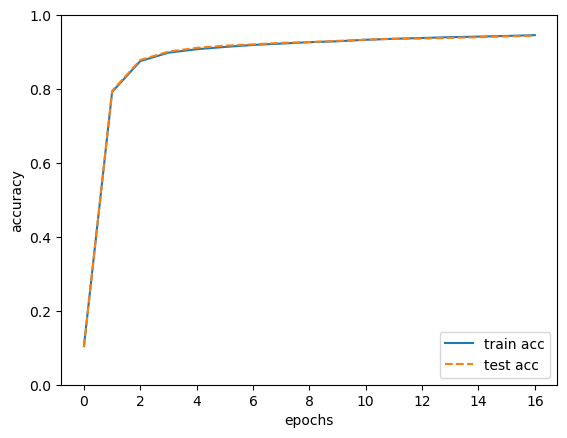

In [216]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist

# 读入数据
# (x_train, t_train)：训练集的特征和标签。
# (x_test, t_test)：测试集的特征和标签。
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## epoch（训练轮次） 

<span style="color: red;">**Epoch 的定义**</span>
* 一个 epoch 表示神经网络已经完整地看过训练集中的每一个样本一次。
* 在一次 epoch 中，所有训练数据会被送入模型进行前向传播和后向传播，并更新模型的参数。

<span style="color: red;">**为什么需要多个 Epoch**</span>?

训练一个神经网络通常需要多个 epoch，原因如下：
1. 单次迭代不足以学到所有数据特性：
* 数据集可能非常复杂，模型在单次遍历数据后，可能还不能很好地拟合数据特征。
* 多次遍历可以让模型反复调整参数，逐步逼近目标函数的最优解。

2. 防止过早停止：
* 如果只用一个 epoch，模型可能只是“浅尝辄止”，无法学到更深层的模式。
* 多个 epoch 能帮助模型逐渐收敛到更优的解。

<span style="color: red;">**一个 Epoch 的工作流程**</span>

在一个 epoch 中，训练的具体流程通常包括以下步骤：
1. 将训练数据按一定顺序或随机顺序输入模型（可能会被打乱）。
2. 将数据划分成多个批次（batch），分批送入神经网络进行训练。
3. 对每个 batch：
   * 进行前向传播计算预测值。
   * 计算损失函数值。
   * 通过反向传播计算梯度。
   * 使用优化算法（如 SGD、Adam）更新权重。
4. 在所有 batch 都完成后，模型完成了一次 epoch。

<span style="color: red;">**Batch 和 Iteration 与 Epoch 的关系**</span>
* Batch（批次）： 为了降低内存需求，训练数据通常分成小批量（batch）。每个 batch 是训练过程中一次前向传播和后向传播的单位。
* Iteration（迭代）： 一次 iteration 表示模型使用一个 batch 的数据进行一次参数更新。
* 关系：
* 如果训练集有  $train\_size$  个样本，每个 batch 包含  $batch\_size$  个样本：

$$
\text{iter\_per\_epoch} = \frac{\text{train\_size}}{\text{batch\_size}}
$$

完成一个 Epoch 需要的 Iteration 数等于训练数据总数除以每批数据大小。

例如：
* 数据集有 10,000 个样本。
* Batch 大小为 100。
* 一个 epoch 包含  $10,000 / 100 = 100$  次 iteration。

<span style="color: red;">**Epoch 的直观类比**</span>

假设你在学习一本书：
* Batch: 每次你学习一章。
* Iteration: 学习完一章后，进行复习和总结。
* Epoch: 学习完整本书一遍。

为了熟练掌握书中的内容，你可能需要多次阅读（即多个 epoch）。